# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [6]:
!pip install opencv-contrib-python


In [2]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/Users/lorna/master2/Cs445/proj1/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

cp: ./utils.py and /Users/lorna/master2/Cs445/proj1/utils.py are identical (not copied).


In [4]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib notebook  
import matplotlib.pyplot as plt


In [6]:
im1_file = datadir + 'nutmeg.jpg'
im2_file = datadir + 'DerekPicture.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

In [8]:
%matplotlib notebook

In [10]:
%matplotlib inline
 


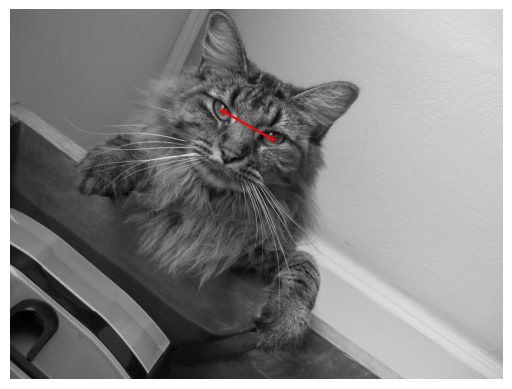

In [12]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

Selected Points for Image 1: [[607 290]
 [748 370]]
Selected Points for Image 2: [[299 343]
 [439 331]]


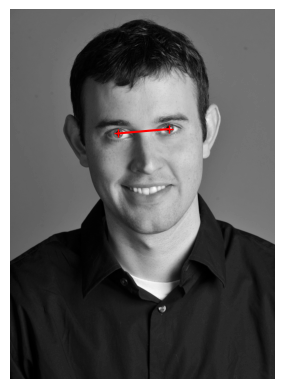

In [14]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

print("Selected Points for Image 1:", pts_im1)
print("Selected Points for Image 2:", pts_im2)

In [16]:
print("pts_im1:", pts_im1)
print("pts_im2:", pts_im2)


pts_im1: [[607 290]
 [748 370]]
pts_im2: [[299 343]
 [439 331]]


In [18]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [20]:
# convert to grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

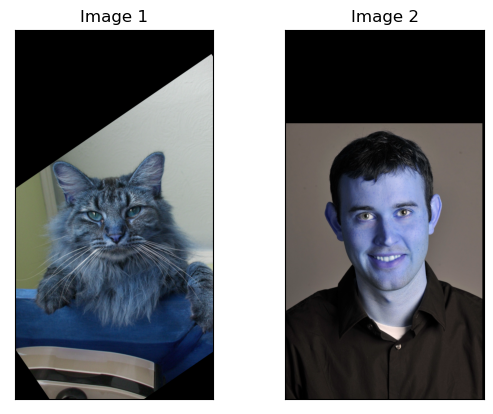

In [22]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [24]:
from scipy.ndimage import gaussian_filter


In [26]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here  
    im1 = np.float32(im1) / 255.0
    im2 = np.float32(im2) / 255.0

    # Apply Gaussian Low-Pass Filter to im1
    low_frequencies = gaussian_filter(im1, sigma_low)

    # Apply Gaussian High-Pass Filter to im2
    blurred_im2 = gaussian_filter(im2, sigma_high)
    high_frequencies = im2 - blurred_im2  # High-pass filter = original - blurred

    # Combine the two filtered images
    hybrid = np.clip(low_frequencies + high_frequencies, 0, 1)

    # Convert back to uint8 for display
    return (hybrid * 255).astype(np.uint8)


In [28]:
sigma_low = 20 # choose parameters that work for your images
sigma_high = 20

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)


{'cropped_image': None, 'crop_bound': None}

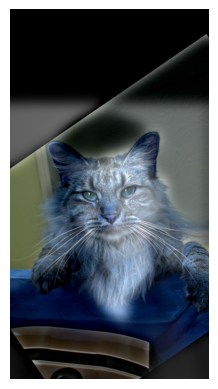

In [29]:
utils.interactive_crop(im_hybrid)

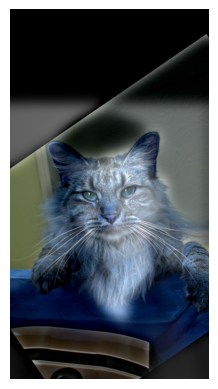

In [30]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

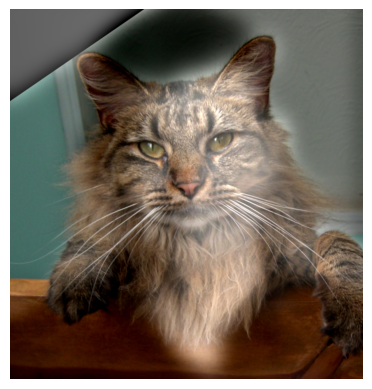

In [34]:

    x1, y1, x2, y2 = 0, 400, im_hybrid.shape[1], im_hybrid.shape[0]-200
    cropped_hybrid = im_hybrid[y1:y2, x1:x2]

    plt.imshow(cv2.cvtColor(cropped_hybrid, cv2.COLOR_BGR2RGB))
    #plt.title("Cropped Hybrid Image (Manual)")
    plt.axis("off")
    plt.show()


In [36]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import signal
import IPython


datadir = "/Users/lorna/master2/Cs445/proj1/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

cp: ./utils.py and /Users/lorna/master2/Cs445/proj1/utils.py are identical (not copied).


In [38]:
%matplotlib notebook  
import matplotlib.pyplot as plt


In [40]:
im11_file = '/Users/lorna/master2/Cs445/proj1/cat.jpg'
im21_file = '/Users/lorna/master2/Cs445/proj1/me.jpg'

im11 = np.float32(cv2.imread(im11_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im21 = np.float32(cv2.imread(im21_file, cv2.IMREAD_GRAYSCALE) / 255.0)

In [42]:
%matplotlib notebook

In [44]:
%matplotlib inline
 


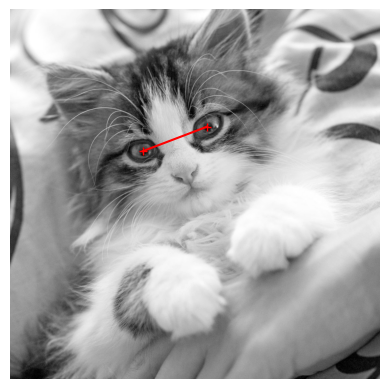

In [46]:
pts_im11 = utils.prompt_eye_selection(im11)
pts_im11 = np.array([[430, 460], [640, 380]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im11[:,0], pts_im11[:,1], 'r-+')

Selected Points for Image 1: [[430 460]
 [640 380]]
Selected Points for Image 2: [[255 220]
 [345 220]]


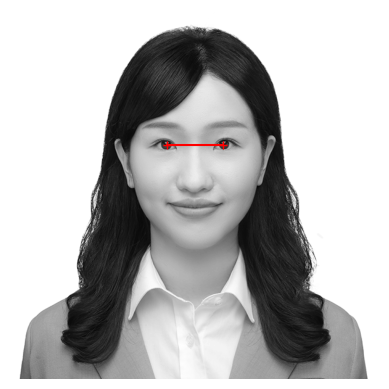

In [48]:
pts_im21 = utils.prompt_eye_selection(im21)
pts_im21 = np.array([[255,220], [345,220]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im21[:,0], pts_im21[:,1], 'r-+')

print("Selected Points for Image 1:", pts_im11)
print("Selected Points for Image 2:", pts_im21)

In [50]:
print("pts_im1:", pts_im11)
print("pts_im2:", pts_im21)


pts_im1: [[430 460]
 [640 380]]
pts_im2: [[255 220]
 [345 220]]


In [52]:
im11, im21 = utils.align_images(im11_file, im21_file,pts_im11,pts_im21,save_images=False)


In [54]:
# convert to grayscale
im11_gray = cv2.cvtColor(im11, cv2.COLOR_BGR2GRAY) / 255.0
im21_gray = cv2.cvtColor(im21, cv2.COLOR_BGR2GRAY) / 255.0

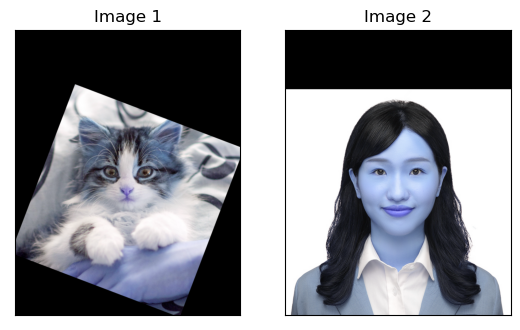

In [56]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im11,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im21,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [58]:
from scipy.ndimage import gaussian_filter


In [60]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here  
    im1 = np.float32(im1) / 255.0
    im2 = np.float32(im2) / 255.0

    # Apply Gaussian Low-Pass Filter to im1
    low_frequencies = gaussian_filter(im1, sigma_low)

    # Apply Gaussian High-Pass Filter to im2
    blurred_im2 = gaussian_filter(im2, sigma_high)
    high_frequencies = im2 - blurred_im2  # High-pass filter = original - blurred

    # Combine the two filtered images
    hybrid = np.clip(low_frequencies + high_frequencies, 0, 1)

    # Convert back to uint8 for display
    return (hybrid * 255).astype(np.uint8)

In [62]:
sigma_low = 20 # choose parameters that work for your images
sigma_high = 20

im_hybrid = hybridImage(im21, im11, sigma_low, sigma_high)


{'cropped_image': None, 'crop_bound': None}

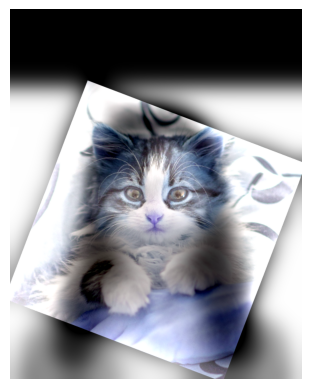

In [63]:
utils.interactive_crop(im_hybrid)

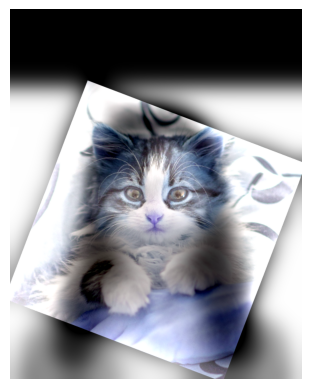

In [66]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

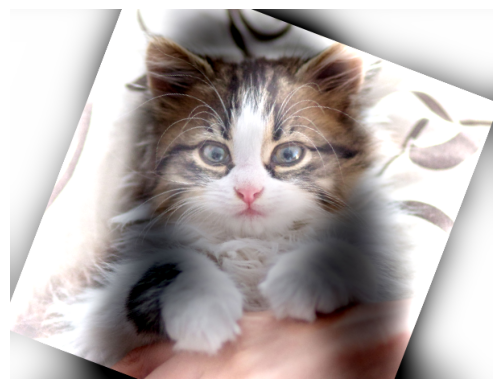

In [68]:
    x1, y1, x2, y2 = 0, 200, im_hybrid.shape[1], im_hybrid.shape[0]-100
    cropped_hybrid = im_hybrid[y1:y2, x1:x2]

    plt.imshow(cv2.cvtColor(cropped_hybrid, cv2.COLOR_BGR2RGB))
    #plt.title("Cropped Hybrid Image (Manual)")
    plt.axis("off")
    plt.show()

-The hybrid image technique blends two images so that one image is visible up close (high-frequency details) and the other appears from afar (low-frequency smoothing). This works because the human visual system prioritizes sharp details when near and smooth shapes when distant.



### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

([], [])

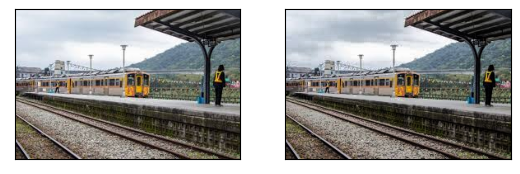

In [74]:
img = cv2.imread("/Users/lorna/master2/Cs445/proj1/train.jpeg")
img_hist = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hist[:,:,2] = cv2.equalizeHist(img_hist[:,:,2])
img_hist = cv2.cvtColor(img_hist, cv2.COLOR_HSV2RGB)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(img_hist)
axes[1].set_xticks([]), axes[1].set_yticks([])

The provided code applies histogram equalization to enhance the brightness (value) channel of an image in the HSV color space, improving its contrast.

#### Color enhancement 

([], [])

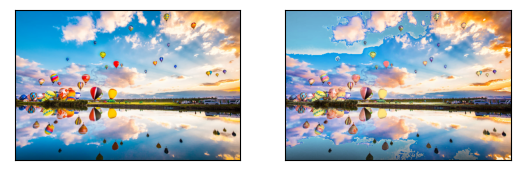

In [78]:
img = cv2.imread("/Users/lorna/master2/Cs445/proj1/ballon.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv[:,:,1] = img_hsv[:,:,1]*1.5
img_hsv[:,:,1][img_hsv[:,:,1] > 255] = 255
fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
axes[1].set_xticks([]), axes[1].set_yticks([])

The provided code enhances color saturation by modifying the Saturation (S) channel in the HSV color space. This makes the colors appear more vibrant.

#### Color shift

([], [])

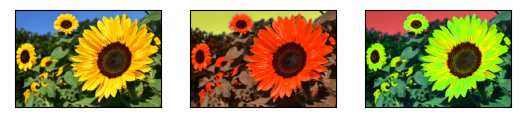

In [82]:
img = cv2.imread("/Users/lorna/master2/Cs445/proj1/flower.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_red = img.copy()
img_yellow = img.copy()
img_red[:,:,0] = img_red[:,:,0]*0.3
img_yellow[:,:,0] = img_yellow[:,:,0]*1.7
img_yellow[:,:,0][img_yellow[:,:,0] > 180] = 180
fig, axes = plt.subplots(1, 3)
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB))
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv2.cvtColor(img_red, cv2.COLOR_HSV2RGB))
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(cv2.cvtColor(img_yellow, cv2.COLOR_HSV2RGB))
axes[2].set_xticks([]), axes[2].set_yticks([])


This code modifies the hue (H) channel in the HSV color space to create two variations of the original image:

Red-tinted version (hue decreased)
Yellow-tinted version (hue increased)
By adjusting the hue values, the colors in the image shift toward different tones.




## Acknowledgments / Attribution

List any sources for code or images from outside sources

https://snapshot.canon-asia.com/tw/article/zh_tw/landscape-photography-quick-tips-for-stunning-deep-focused-images
https://www.britannica.com/science/flower
